In [1]:
import numpy as np
import pandas


In [14]:
x= np.array([[1,3],[5,18],[3,9],[24,90],[7,15],[8,18],[13,30],[1,3],[4,16],[2,4],[4,18.5],[5,
                         10],[6,13],[1.8,6],[10,99],[9,79],[8.6,65],[13,150],[1,6],[4,11]])

In [15]:
x

array([[  1. ,   3. ],
       [  5. ,  18. ],
       [  3. ,   9. ],
       [ 24. ,  90. ],
       [  7. ,  15. ],
       [  8. ,  18. ],
       [ 13. ,  30. ],
       [  1. ,   3. ],
       [  4. ,  16. ],
       [  2. ,   4. ],
       [  4. ,  18.5],
       [  5. ,  10. ],
       [  6. ,  13. ],
       [  1.8,   6. ],
       [ 10. ,  99. ],
       [  9. ,  79. ],
       [  8.6,  65. ],
       [ 13. , 150. ],
       [  1. ,   6. ],
       [  4. ,  11. ]])

In [16]:
input= np.array([[x]  for x in np.array(x[:,0])])
print(np.array(input))


[[ 1. ]
 [ 5. ]
 [ 3. ]
 [24. ]
 [ 7. ]
 [ 8. ]
 [13. ]
 [ 1. ]
 [ 4. ]
 [ 2. ]
 [ 4. ]
 [ 5. ]
 [ 6. ]
 [ 1.8]
 [10. ]
 [ 9. ]
 [ 8.6]
 [13. ]
 [ 1. ]
 [ 4. ]]


In [17]:
output= np.array([[x]  for x in np.array(x[:,1])])
output

array([[  3. ],
       [ 18. ],
       [  9. ],
       [ 90. ],
       [ 15. ],
       [ 18. ],
       [ 30. ],
       [  3. ],
       [ 16. ],
       [  4. ],
       [ 18.5],
       [ 10. ],
       [ 13. ],
       [  6. ],
       [ 99. ],
       [ 79. ],
       [ 65. ],
       [150. ],
       [  6. ],
       [ 11. ]])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

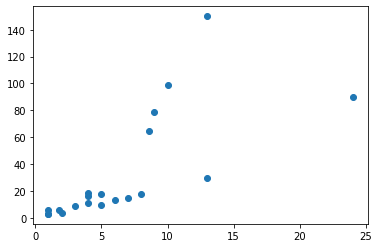

In [19]:
plt.scatter(input,output)

In [26]:
class LinearRegression:
    def __init__(self, iteration=10, learning_rate=0.01):
        self.iterat=iteration
        self.lr=learning_rate
        
        self.weights=None
        self.bias=None
        
    def fit(self, input_X, output_Y):
        nrecords, nfeatures = input_X.shape
        
        print("records= ", nrecords, "  features= ", nfeatures)
        self.weights= np.zeros(nfeatures)
        
        self.bias=0.0
        fig= plt.figure()
        f= fig.add_subplot(111)
        f.scatter(input,output)
        
        for it in range(self.iterat):
            model = input_X * self.weights + self.bias  # model= np.dot(input_X, self.weights) + self.bias        
            loss= (1/nrecords)* np.sum((model- output_Y)**2)
            
            dw = (1/nrecords)*self.lr*2*np.dot(np.transpose(input_X),(model-output_Y))
            db = (1/nrecords)*self.lr*2*np.sum(model-output_Y) 
        
            self.weights =  self.weights- dw
            self.bias = self.bias-db
            
            print("-------> iteration number: ",it,"  Loss: ",loss)
            print("-------> weights: ",self.weights)    
 

            y=self.predict(input)

            if it%40==0 or it== self.iterat-1:
                f.plot(input,y,color="red", alpha=self.iterat/(it+1))
      

    def predict(self, input_X):
#         return (input_X * self.weights  + self.bias)[:,0]
        return (np.dot(input_X ,self.weights) + self.bias)[:,0]


In [27]:
model= LinearRegression(iteration=40)

records=  20   features=  1
-------> iteration number:  0   Loss:  2690.7625000000003
-------> weights:  [[7.4668]]
-------> iteration number:  1   Loss:  1137.3149522644005
-------> weights:  [[4.13072824]]
-------> iteration number:  2   Loss:  826.7350719533275
-------> weights:  [[5.62476334]]
-------> iteration number:  3   Loss:  764.6196376595743
-------> weights:  [[4.9591653]]
-------> iteration number:  4   Loss:  752.1756289136528
-------> weights:  [[5.2591523]]
-------> iteration number:  5   Loss:  749.6619531187162
-------> weights:  [[5.12739238]]
-------> iteration number:  6   Loss:  749.1338870573253
-------> weights:  [[5.18865385]]
-------> iteration number:  7   Loss:  749.0031794719022
-------> weights:  [[5.16359356]]
-------> iteration number:  8   Loss:  748.9523134469771
-------> weights:  [[5.17711018]]
-------> iteration number:  9   Loss:  748.917807059916
-------> weights:  [[5.1733598]]
-------> iteration number:  10   Loss:  748.8869631050558
-------> w

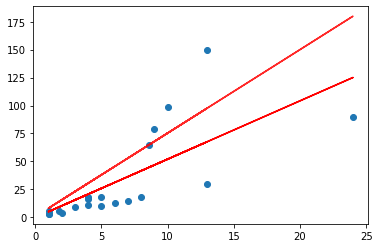

In [28]:
model.fit(np.array(input),np.array(output))

In [23]:
y=model.predict(input)

(20,) (20, 1)


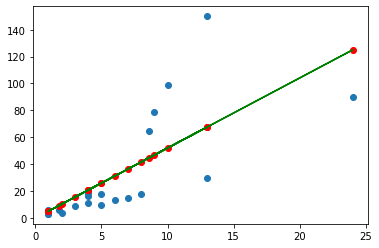

In [24]:
plt.scatter(input,output)
print(y.shape, input.shape) 
plt.scatter(input,y,color="red")
plt.plot(input,y,color="green")

In [25]:
model.predict(44)


array([229.37774674])